##### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re

##### Criando alguns filtros de Warning

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

##### Carregando o Dataset 


In [3]:
df = pd.read_csv('carros.csv')

display(df)

,Título,Descrição,Preço,Local,Ano,KM Rodado
0,Chevrolet Onix,Onix 1.0 Joy SPE/4 manual,"R$ 52.900,00","Belo Horizonte, MG",2019/2019,72.000 Km
1,Honda CR-V,CR-V 2.0 16V 4X4 EXL (aut) automático,"R$ 89.000,00","Vassouras, RJ",2012/2012,80.000 Km
2,BMW Série 3,320i ActiveFlex automático,"R$ 114.900,00","Sinop, MT",2015/2015,10 Km
3,Hyundai HB20,HB20 1.6 Comfort Plus (Aut) automático,"R$ 70.900,00","Taubaté, SP",2018/2019,56.000 Km
4,Chevrolet Tracker,Tracker 1.2 Turbo Premier (Aut) automático,"R$ 108.900,00","Belo Horizonte, MG",2020/2021,40.000 Km
...,...,...,...,...,...,...
9855,Fiat Uno,Uno 1.0 Attractive manual,"R$ 53.100,00","Uberlândia, MG",2021/2021,43.071 Km
9856,Fiat Uno,Uno 1.0 Attractive manual,"R$ 53.100,00","Uberlândia, MG",2021/2021,42.958 Km
9857,Fiat Uno,Uno 1.0 Attractive manual,"R$ 53.100,00","Uberaba, MG",2021/2021,42.235 Km
9858,Fiat Uno,Uno 1.0 Attractive manual,"R$ 53.100,00","Uberaba, MG",2021/2021,42.167 Km


##### Analisando as Informaçôes do Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9860 entries, 0 to 9859
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Título     9860 non-null   object
 1   Descrição  9860 non-null   object
 2   Preço      9860 non-null   object
 3   Local      9860 non-null   object
 4   Ano        9860 non-null   object
 5   KM Rodado  9860 non-null   object
dtypes: object(6)
memory usage: 462.3+ KB


# Fazendo a Limpeza do Dataset

##### Setando o Dataset 

In [5]:
df['Preço'] = df['Preço'].str.replace('R\$', '').str.split(',', expand=True)[0].str.replace('.', '').astype(int)
df['Ano'] = df['Ano'].str.split('/', expand=True)[0].astype(int)
df['KM Rodado'] = df['KM Rodado'].replace('N/D', '0 Km').str.replace(' Km', '').str.replace('.', '').str.replace(',', '.').astype(int)
df.info()

display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9860 entries, 0 to 9859
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Título     9860 non-null   object
 1   Descrição  9860 non-null   object
 2   Preço      9860 non-null   int32 
 3   Local      9860 non-null   object
 4   Ano        9860 non-null   int32 
 5   KM Rodado  9860 non-null   int32 
dtypes: int32(3), object(3)
memory usage: 346.8+ KB


,Título,Descrição,Preço,Local,Ano,KM Rodado
0,Chevrolet Onix,Onix 1.0 Joy SPE/4 manual,52900,"Belo Horizonte, MG",2019,72000
1,Honda CR-V,CR-V 2.0 16V 4X4 EXL (aut) automático,89000,"Vassouras, RJ",2012,80000
2,BMW Série 3,320i ActiveFlex automático,114900,"Sinop, MT",2015,10
3,Hyundai HB20,HB20 1.6 Comfort Plus (Aut) automático,70900,"Taubaté, SP",2018,56000
4,Chevrolet Tracker,Tracker 1.2 Turbo Premier (Aut) automático,108900,"Belo Horizonte, MG",2020,40000
...,...,...,...,...,...,...
9855,Fiat Uno,Uno 1.0 Attractive manual,53100,"Uberlândia, MG",2021,43071
9856,Fiat Uno,Uno 1.0 Attractive manual,53100,"Uberlândia, MG",2021,42958
9857,Fiat Uno,Uno 1.0 Attractive manual,53100,"Uberaba, MG",2021,42235
9858,Fiat Uno,Uno 1.0 Attractive manual,53100,"Uberaba, MG",2021,42167


##### Criando novas Colunas para o Dataset


In [6]:
df[['Marca', 'Carro']] = df['Título'].str.split(' ', 1, expand=True)
df[['Cidade', 'Estado']] = df['Local'].str.split(', ', 1, expand=True)
df = df.drop('Local', axis=1)
df = df.drop('Título', axis=1)
df['Transmissão'] = df['Descrição'].apply(lambda x: re.findall(r'(manual|automático)', x)[0].capitalize())
df['Descrição'] = df['Descrição'].apply(lambda x: re.sub(r'( manual| automático)', '', x))

In [7]:
display(df)

,Descrição,Preço,Ano,KM Rodado,Marca,Carro,Cidade,Estado,Transmissão
0,Onix 1.0 Joy SPE/4,52900,2019,72000,Chevrolet,Onix,Belo Horizonte,MG,Manual
1,CR-V 2.0 16V 4X4 EXL (aut),89000,2012,80000,Honda,CR-V,Vassouras,RJ,Automático
2,320i ActiveFlex,114900,2015,10,BMW,Série 3,Sinop,MT,Automático
3,HB20 1.6 Comfort Plus (Aut),70900,2018,56000,Hyundai,HB20,Taubaté,SP,Automático
4,Tracker 1.2 Turbo Premier (Aut),108900,2020,40000,Chevrolet,Tracker,Belo Horizonte,MG,Automático
...,...,...,...,...,...,...,...,...,...
9855,Uno 1.0 Attractive,53100,2021,43071,Fiat,Uno,Uberlândia,MG,Manual
9856,Uno 1.0 Attractive,53100,2021,42958,Fiat,Uno,Uberlândia,MG,Manual
9857,Uno 1.0 Attractive,53100,2021,42235,Fiat,Uno,Uberaba,MG,Manual
9858,Uno 1.0 Attractive,53100,2021,42167,Fiat,Uno,Uberaba,MG,Manual


In [8]:
df = df[['Marca', 'Carro', 'Descrição', 'Preço', 'Ano', 'KM Rodado', 'Transmissão', 'Cidade', 'Estado']]

display(df)

,Marca,Carro,Descrição,Preço,Ano,KM Rodado,Transmissão,Cidade,Estado
0,Chevrolet,Onix,Onix 1.0 Joy SPE/4,52900,2019,72000,Manual,Belo Horizonte,MG
1,Honda,CR-V,CR-V 2.0 16V 4X4 EXL (aut),89000,2012,80000,Automático,Vassouras,RJ
2,BMW,Série 3,320i ActiveFlex,114900,2015,10,Automático,Sinop,MT
3,Hyundai,HB20,HB20 1.6 Comfort Plus (Aut),70900,2018,56000,Automático,Taubaté,SP
4,Chevrolet,Tracker,Tracker 1.2 Turbo Premier (Aut),108900,2020,40000,Automático,Belo Horizonte,MG
...,...,...,...,...,...,...,...,...,...
9855,Fiat,Uno,Uno 1.0 Attractive,53100,2021,43071,Manual,Uberlândia,MG
9856,Fiat,Uno,Uno 1.0 Attractive,53100,2021,42958,Manual,Uberlândia,MG
9857,Fiat,Uno,Uno 1.0 Attractive,53100,2021,42235,Manual,Uberaba,MG
9858,Fiat,Uno,Uno 1.0 Attractive,53100,2021,42167,Manual,Uberaba,MG


# Começando a Análise Exploratória 

In [9]:
display(df.describe())

,Preço,Ano,KM Rodado
count,9860.000000,9860.000000,9860.000000
mean,44088.546653,2015.150101,93715.237830
std,7952.304035,4.132920,45789.758975
min,15500.000000,1961.000000,0.000000
25%,38900.000000,2012.000000,61000.000000
50%,45990.000000,2015.000000,88846.500000
75%,50782.500000,2019.000000,122434.500000
max,114900.000000,2022.000000,500000.000000


considerações baseadas no describe:
Preço:
A média dos preços dos carros é de aproximadamente 44.088,55.
O desvio padrão indica que os preços variam em torno de 7.952,30 em relação à média.
O menor preço registrado é de 15.500,00, e o maior preço é de 114.900,00.
A mediana dos preços é de 45.990,00, o que significa que metade dos carros tem um preço igual ou inferior a esse valor.

Ano:
A média dos anos dos carros é de aproximadamente 2015.
O desvio padrão indica que os anos dos carros variam em cerca de 4 anos em relação à média.
O ano mais antigo registrado é 1961, enquanto o ano mais recente é 2022.
A mediana dos anos dos carros é de 2015, o que significa que metade dos carros tem um ano igual ou inferior a esse valor.

KM Rodado:
A média da quilometragem rodada dos carros é de aproximadamente 93.715,24 km.
O desvio padrão indica que a quilometragem rodada dos carros varia em cerca de 45.789,76 km em relação à média.
A quilometragem mínima registrada é 0 km, enquanto a máxima é de 500.000 km.
A mediana da quilometragem rodada é de 88.846,5 km, o que significa que metade dos carros tem uma quilometragem igual ou inferior a esse valor.

In [10]:
correlation_matrix = df[['Preço', 'Ano', 'KM Rodado']].corr()

display(correlation_matrix)

,Preço,Ano,KM Rodado
Preço,1.000000,0.695517,-0.498438
Ano,0.695517,1.000000,-0.639983
KM Rodado,-0.498438,-0.639983,1.000000


Correlação entre Preço e Ano:
-Existe uma correlação positiva moderada de aproximadamente 0.70.
-Carros mais recentes tendem a ter preços mais altos.

Correlação entre Preço e KM Rodado:
-Existe uma correlação negativa moderada de aproximadamente -0.50.
-Carros com maior quilometragem tendem a ter preços mais baixos.

Correlação entre Ano e KM Rodado:
-Existe uma correlação negativa moderada de aproximadamente -0.64.
-Carros mais antigos tendem a ter maior quilometragem.

Não há correlação perfeita entre nenhuma das variáveis.
-Isso significa que o preço dos carros não é determinado exclusivamente pelo ano de fabricação ou pela quilometragem rodada.

##### Visualizando a Quantidade de Carros Por Faixa de Preço

In [11]:
faixa = [15000, 30000, 45000, 60000, 75000, 90000, 105000, 120000]
categorias = pd.cut(df['Preço'], bins=faixa)
contagem = categorias.value_counts().sort_index()

display(contagem)

(15000, 30000]       858
(30000, 45000]      3746
(45000, 60000]      5252
(60000, 75000]         1
(75000, 90000]         1
(90000, 105000]        0
(105000, 120000]       2
Name: Preço, dtype: int64

Podemos observar que a maior quantidade de carros está concentrada nas faixas de preço entre 30.000 e 60.000. Essa faixa intermediária parece ser a mais comum, indicando que a maioria dos carros possui valores nessa faixa.
Por outro lado, há menos carros nas faixas de preço mais baixas (15.000 a 30.000) e nas faixas de preço mais altas (acima de 60.000). 
Isso pode indicar que os carros com preços mais baixos são menos comuns, assim como os carros com preços mais altos, que podem representar modelos mais luxuosos.

##### Visualizando a Quantidade de Carros por Marca

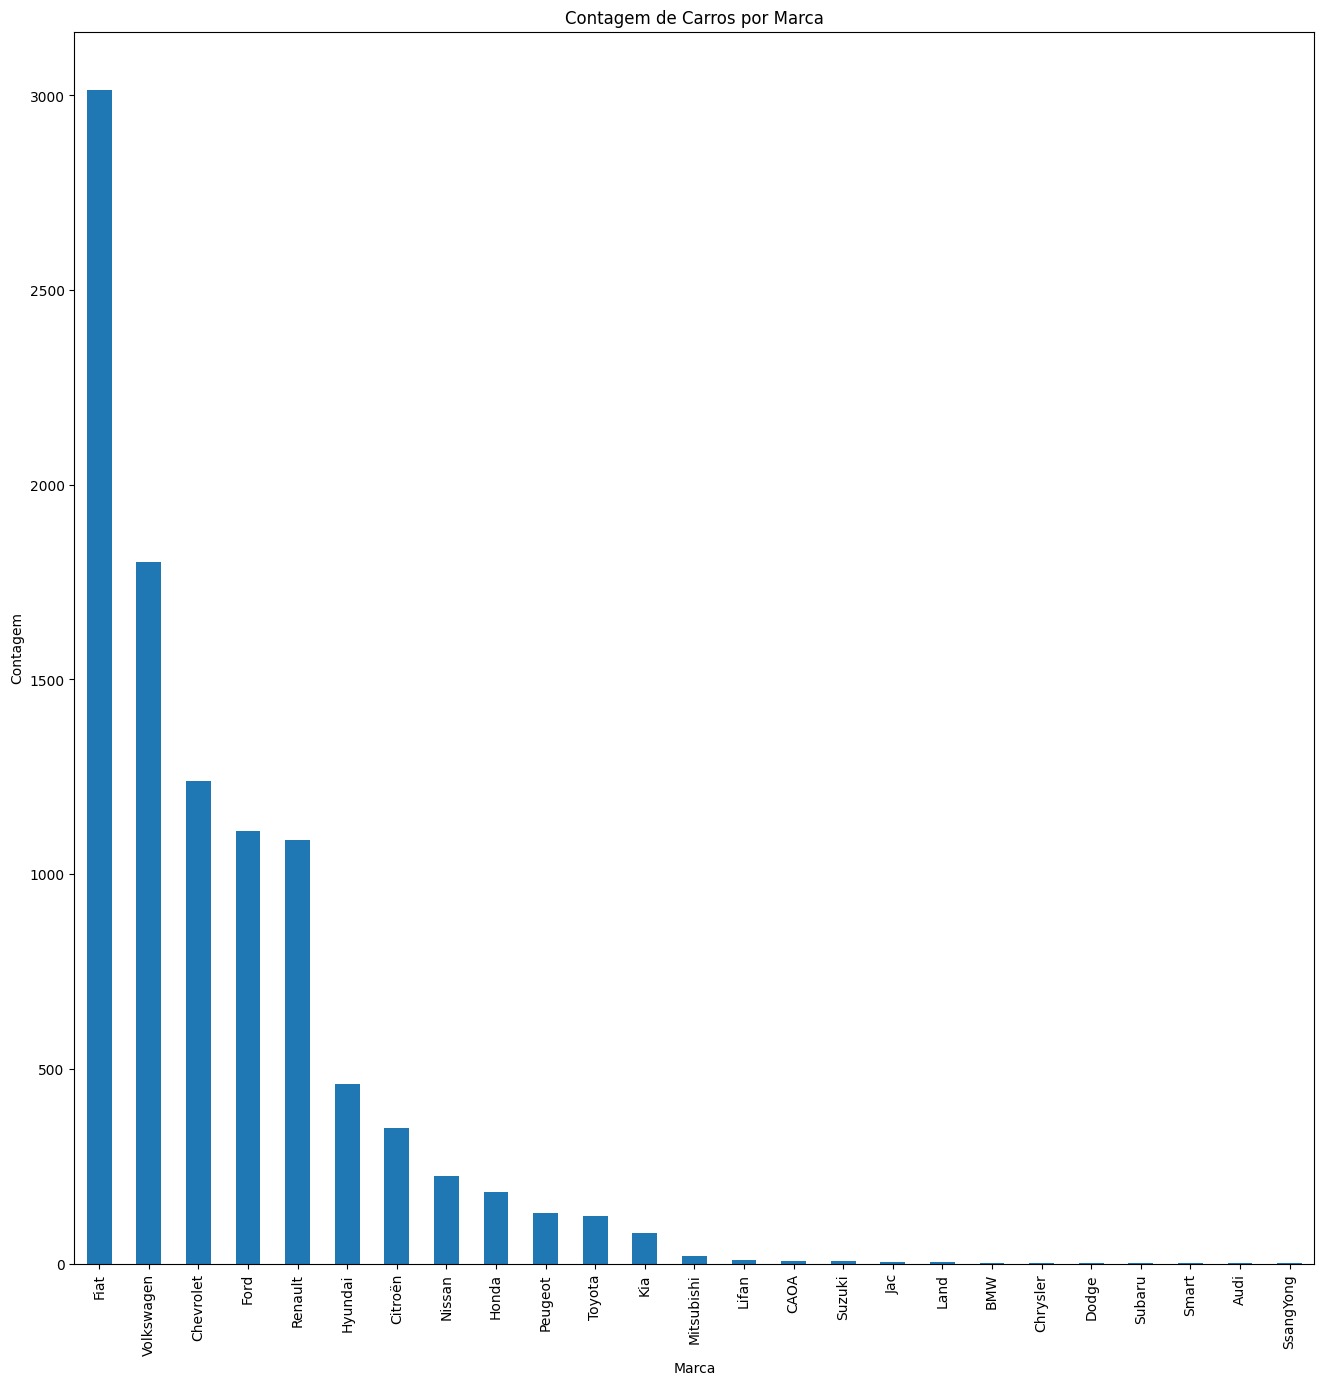

Fiat          3013
Volkswagen    1801
Chevrolet     1238
Ford          1110
Renault       1088
Hyundai        462
Citroën        348
Nissan         225
Honda          185
Peugeot        129
Toyota         121
Kia             79
Mitsubishi      20
Lifan            9
CAOA             6
Suzuki           6
Jac              5
Land             5
BMW              2
Chrysler         2
Dodge            2
Subaru           1
Smart            1
Audi             1
SsangYong        1
Name: Marca, dtype: int64

In [12]:
plt.figure(figsize=(16, 16)) 
df['Marca'].value_counts().plot(kind='bar')
plt.xlabel('Marca')
plt.ylabel('Contagem')
plt.title('Contagem de Carros por Marca')
plt.show()

display(df['Marca'].value_counts())

Algumas observações sobre esses números:

Existem marcas que se destacam em termos de quantidade, como Fiat, Volkswagen, Chevrolet, Ford e Renault. Essas marcas possuem um número significativo de carros representados nos dados.

Algumas marcas possuem uma presença mais limitada, com contagens menores. Isso indica que essas marcas têm uma participação menor no conjunto de dados analisado.

É interessante observar a diversidade de marcas presentes no conjunto de dados. Existem marcas populares e bem estabelecidas, como Fiat e Volkswagen, assim como marcas menos conhecidas ou de nicho, como Lifan, Smart e SsangYong.

##### Analisando o Preço por Transmissão 

##### Visualizando a Média de Preços por Marca

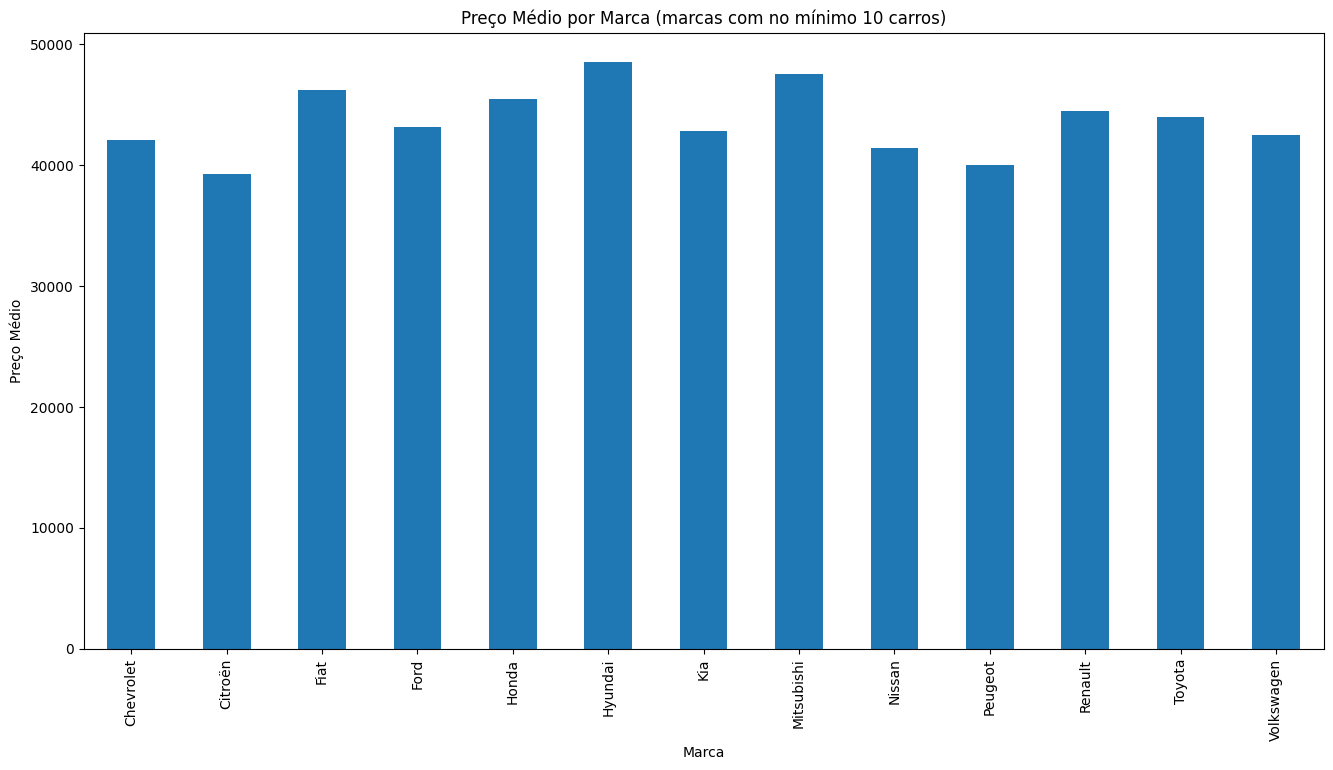

Marca
Chevrolet     42081.928918
Citroën       39234.020115
Fiat          46252.167939
Ford          43178.110811
Honda         45459.362162
Hyundai       48541.268398
Kia           42816.265823
Mitsubishi    47522.900000
Nissan        41386.382222
Peugeot       40016.240310
Renault       44473.794118
Toyota        43950.206612
Volkswagen    42481.745142
Name: Preço, dtype: float64

In [13]:
marcas_filt = df['Marca'].value_counts()[df['Marca'].value_counts() >= 10].index
df_filt = df[df['Marca'].isin(marcas_filt)]
plt.figure(figsize=(16, 8))
df_filt.groupby('Marca')['Preço'].mean().plot(kind='bar')
plt.xlabel('Marca')
plt.ylabel('Preço Médio')
plt.title('Preço Médio por Marca (marcas com no mínimo 10 carros)')
plt.show()

preco_medio = df_filt.groupby('Marca')['Preço'].mean()
display(preco_medio)

A tabela apresenta o preço médio dos carros por marca, considerando apenas as marcas que possuem no mínimo 10 carros na amostra. Podemos observar que os preços médios variam entre as marcas, mas é importante ressaltar que esses valores são médias e podem variar de acordo com vários fatores, como modelo, ano, estado do veículo e opcionais.

Algumas marcas como Hyundai e Mitsubishi apresentam preços médios um pouco mais elevados, enquanto marcas como Citroën e Peugeot possuem preços médios um pouco mais baixos. Chevrolet, Fiat, Ford, Honda, Kia, Nissan, Renault, Toyota e Volkswagen estão posicionadas em uma faixa intermediária de preços médios.

É importante considerar essas informações ao buscar um carro de determinada marca, mas também é recomendado realizar uma análise mais detalhada levando em conta outros aspectos, como características específicas do veículo, histórico de manutenção, avaliação do mercado e comparativo de preços.

##### Visualizando a Quantidade de carros por Estado

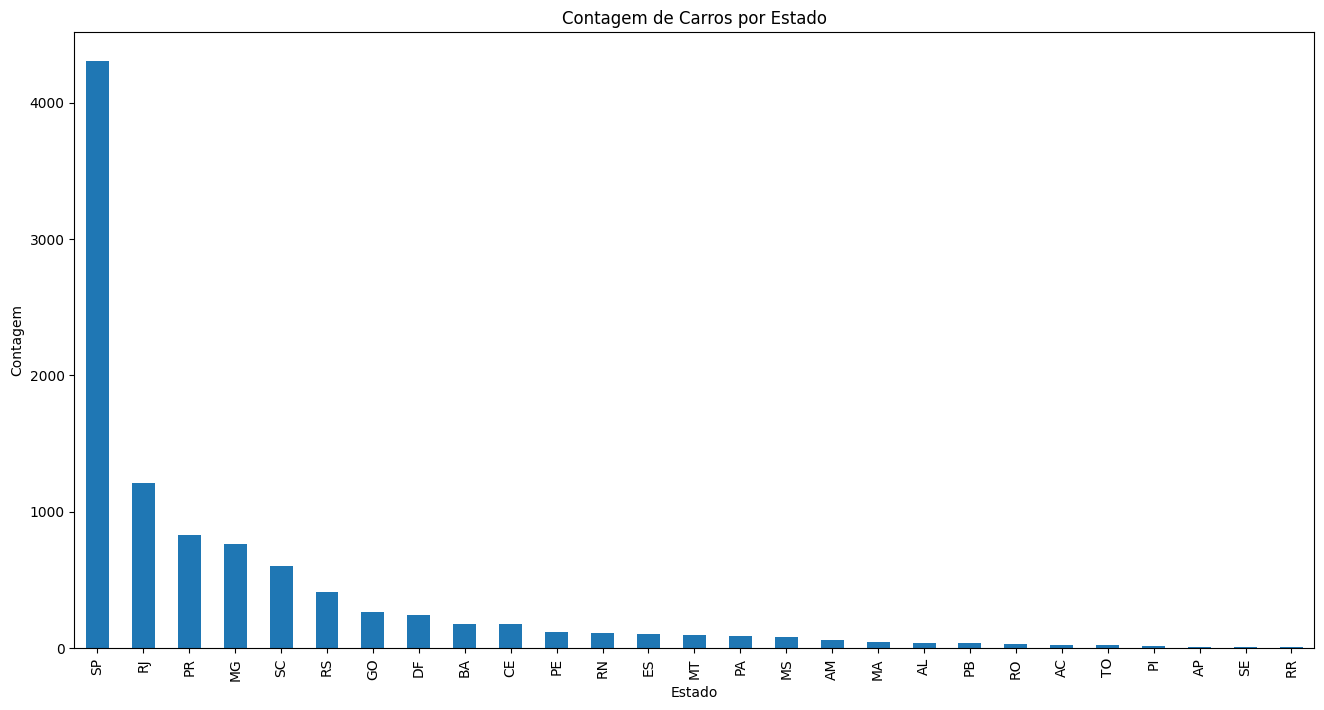

SP    4303
RJ    1213
PR     827
MG     766
SC     602
RS     413
GO     265
DF     241
BA     178
CE     178
PE     119
RN     111
ES     106
MT      94
PA      89
MS      80
AM      60
MA      46
AL      36
PB      33
RO      32
AC      20
TO      20
PI      11
AP       9
SE       4
RR       4
Name: Estado, dtype: int64

In [14]:
uf_cont=df['Estado'].value_counts()
plt.figure(figsize=(16, 8))
uf_cont.plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Contagem')
plt.title('Contagem de Carros por Estado')
plt.show()

display(uf_cont)

Podemos observar os seguintes pontos:

São Paulo (SP) possui a maior quantidade de carros anunciados, com 4303 veículos registrados. Isso indica uma alta atividade de vendas nessa região, possivelmente devido à sua população e ao mercado automotivo desenvolvido.
Rio de Janeiro (RJ) ocupa o segundo lugar, com 1213 carros anunciados. Essa quantidade expressiva sugere uma demanda considerável por carros no estado.
Paraná (PR), Minas Gerais (MG), Santa Catarina (SC) e Rio Grande do Sul (RS) também possuem uma quantidade significativa de carros anunciados, com 827, 766, 602 e 413 veículos, respectivamente. Isso indica uma presença ativa de anúncios de carros nessas regiões.
Algumas localidades apresentam uma contagem menor de carros anunciados, como Roraima (RR), Sergipe (SE), Amapá (AP) e Tocantins (TO), com apenas 4, 4, 9 e 20 veículos, respectivamente. Isso sugere uma menor atividade de vendas de carros nessas áreas.
Essa distribuição nos fornece insights sobre as áreas geográficas com maior e menor atividade de vendas de carros na internet. As regiões com maior quantidade de carros anunciados podem indicar uma maior oferta de veículos usados ou uma maior participação de mercado de vendas online nesses locais

##### Visualizando as 10 Cidades com mais Carros no Dataset

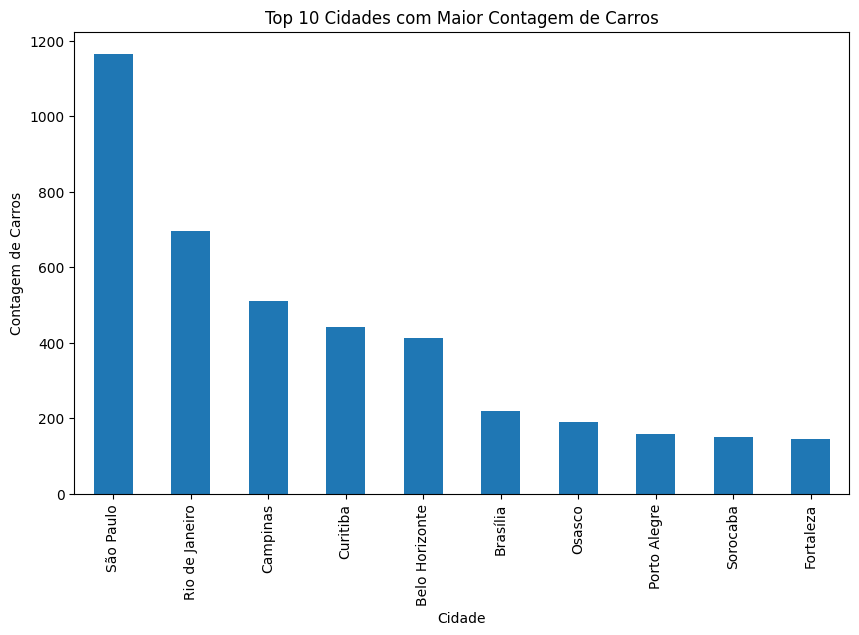

São Paulo         1166
Rio de Janeiro     695
Campinas           510
Curitiba           443
Belo Horizonte     412
Brasília           218
Osasco             191
Porto Alegre       158
Sorocaba           149
Fortaleza          144
Name: Cidade, dtype: int64

In [15]:
cont_cidades = df['Cidade'].value_counts()
top_cidades = cont_cidades.nlargest(10)
plt.figure(figsize=(10, 6))
top_cidades.plot(kind='bar')
plt.xlabel('Cidade')
plt.ylabel('Contagem de Carros')
plt.title('Top 10 Cidades com Maior Contagem de Carros')
plt.show()

display(top_cidades)

Com base nos dados do site de vendas de carros, podemos identificar as 10 cidades com a maior quantidade de carros registrados. Essa informação nos permite fazer as seguintes observações:

São Paulo: Liderando a contagem, São Paulo possui 4303 carros registrados, o que indica uma alta demanda por veículos nessa cidade.
Rio de Janeiro: Em segundo lugar, o Rio de Janeiro conta com 1213 carros registrados, mostrando uma presença significativa de veículos anunciados.
Campinas: Com 510 carros registrados, Campinas apresenta uma quantidade considerável de veículos no dataset.
Curitiba: A cidade de Curitiba registra 443 carros, indicando um mercado automotivo ativo na região.
Belo Horizonte: Com 412 carros registrados, Belo Horizonte também se destaca como uma cidade com uma boa quantidade de veículos anunciados.
Brasília, Osasco, Porto Alegre, Sorocaba e Fortaleza: Essas cidades apresentam uma contagem considerável de carros, variando de 218 a 144, refletindo uma demanda significativa por veículos nessas localidades.
Essa distribuição nos fornece insights sobre a concentração de carros em diferentes cidades, permitindo uma compreensão do mercado automotivo em diversas regiões. Essas informações podem ser valiosas para análises de mercado, estratégias de vendas e tomada de decisões relacionadas ao setor automotivo.

##### Quais os Anos mais Frequentes nos Carros Anunciados?

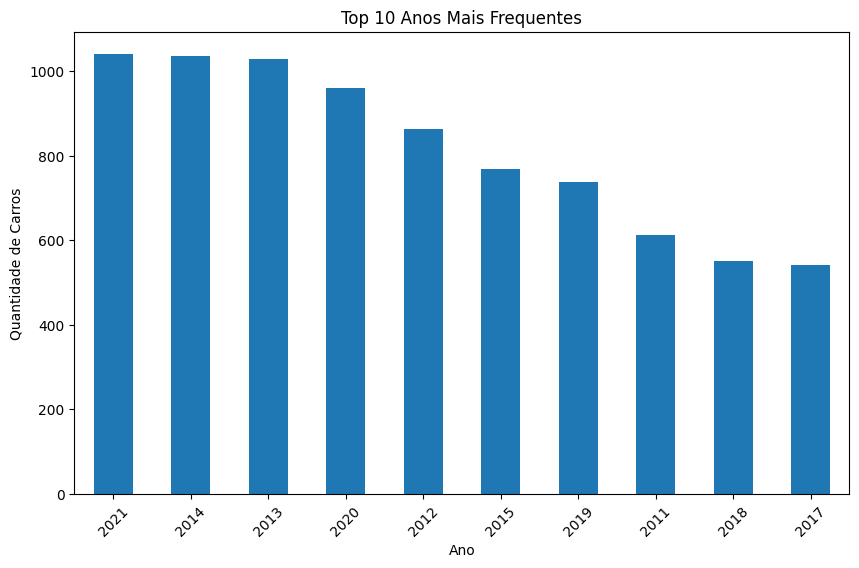

2021    1041
2014    1035
2013    1029
2020     961
2012     863
2015     768
2019     739
2011     613
2018     551
2017     541
Name: Ano, dtype: int64

In [16]:
carro_ano = df['Ano'].value_counts().head(10)
plt.figure(figsize=(10, 6))
carro_ano.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Carros')
plt.title('Top 10 Anos Mais Frequentes')
plt.xticks(rotation=45)
plt.show()

display(carro_ano)

Ao analisar a contagem dos anos de fabricação dos carros anunciados, podemos observar algumas tendências interessantes.

O ano de 2021 aparece como o mais frequente, com 1041 carros registrados, seguido de perto pelo ano de 2014, com 1035 carros. Esses números indicam uma demanda significativa por carros mais recentes e modelos mais atualizados, refletindo o interesse dos compradores por tecnologia e inovação automotiva.
Além disso, notamos uma presença expressiva de carros dos anos 2013, 2020, 2012 e 2015, o que sugere que esses anos de fabricação também são populares entre os anunciantes e compradores. Essa diversidade de opções mais recentes e semi-novas pode proporcionar aos compradores uma variedade de escolhas em diferentes faixas de preço.
Embora os anos mais antigos, como 2011, 2018, 2017 e 2016, tenham uma contagem menor, eles ainda estão presentes no mercado. Essa oferta de carros usados pode atrair compradores que buscam opções mais acessíveis ou que preferem modelos específicos que foram lançados em anos anteriores.

##### Visualizando qual Transmissão é mais usada por cada Marca

<Figure size 1600x800 with 0 Axes>

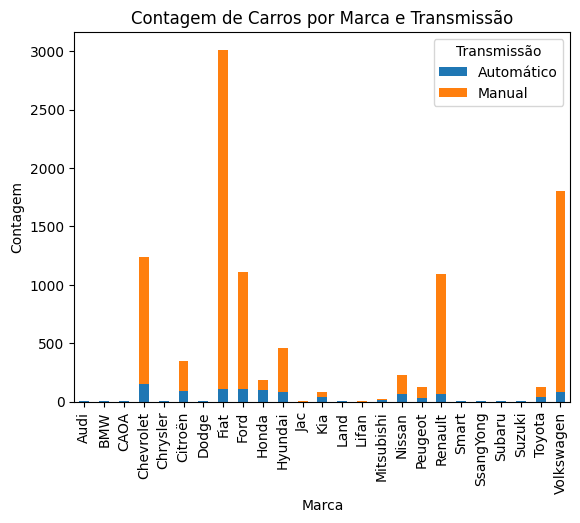

Transmissão,Automático,Manual
Marca,,
Audi,1,0
BMW,2,0
CAOA,1,5
Chevrolet,148,1090
Chrysler,2,0
Citroën,92,256
Dodge,2,0
Fiat,107,2906
Ford,107,1003


In [17]:
contingencia = pd.crosstab(df['Marca'], df['Transmissão'])
plt.figure(figsize=(16, 8))
contingencia.plot(kind='bar', stacked=True)
plt.xlabel('Marca')
plt.ylabel('Contagem')
plt.title('Contagem de Carros por Marca e Transmissão')
plt.show()

display(contingencia)

algumas observações gerais sobre os números:

Podemos perceber que a maioria das marcas oferece uma variedade de opções de transmissão, incluindo tanto veículos com transmissão automática quanto manual. Isso indica que ambas as opções são comuns e amplamente disponíveis no mercado de automóveis.
É interessante notar que algumas marcas podem ter uma preferência mais pronunciada por um tipo específico de transmissão. Por exemplo, a Fiat e a Renault tendem a oferecer mais carros com transmissão manual, enquanto outras marcas, como BMW e Mitsubishi, podem apresentar uma oferta maior de carros com transmissão automática. Essa diversidade de opções reflete as preferências e estratégias de mercado de cada fabricante.
Além disso, é possível observar que algumas marcas têm uma oferta exclusiva de carros com um tipo específico de transmissão, o que pode ser uma estratégia para atender a um público-alvo específico ou refletir as características dos modelos oferecidos.
No entanto, também existem marcas que buscam equilibrar a oferta, disponibilizando opções tanto com transmissão automática quanto manual. Essas marcas demonstram uma compreensão das preferências variadas dos consumidores e oferecem escolhas para atender a diferentes necessidades e preferências de transmissão.

##### Quais os Carros Mais Anunciados?

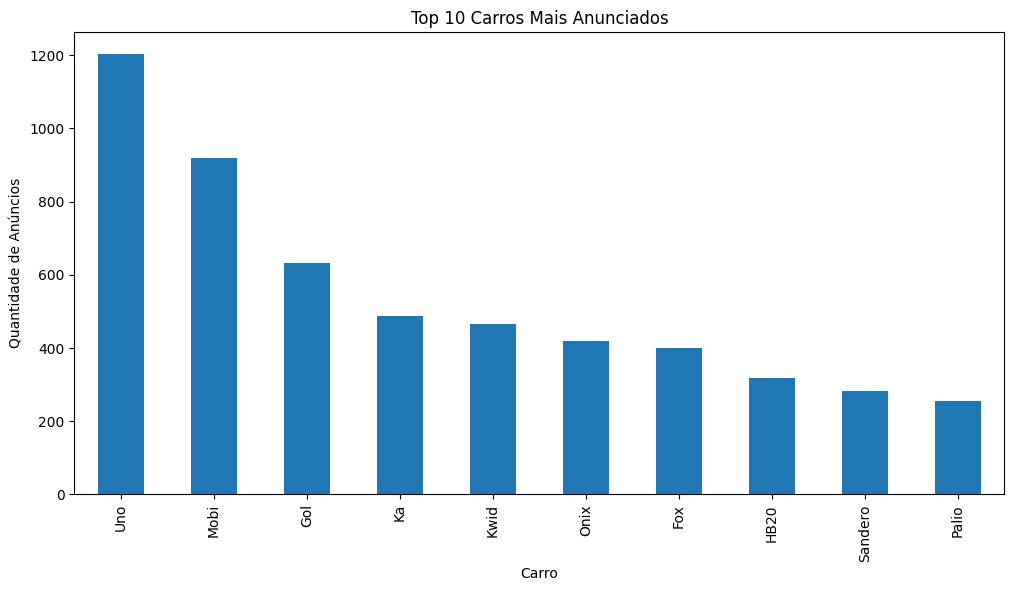

Uno        1203
Mobi        920
Gol         632
Ka          488
Kwid        466
Onix        419
Fox         401
HB20        319
Sandero     283
Palio       256
Name: Carro, dtype: int64

In [18]:
top_anunc = df['Carro'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_anunc.plot(kind='bar')
plt.xlabel('Carro')
plt.ylabel('Quantidade de Anúncios')
plt.title('Top 10 Carros Mais Anunciados')
plt.show()

display(top_anunc)

Podemos observar que todos os modelos listados, incluindo Uno, Mobi, Gol, Ka, Kwid, Onix, Fox, HB20, Sandero e Palio, são considerados carros populares. Esses modelos têm sido amplamente conhecidos e populares entre os consumidores, o que se reflete na quantidade de anúncios encontrados.

Esses carros populares geralmente têm características como eficiência, bom custo-benefício, manutenção acessível e adequação para uso diário. Eles atendem a uma ampla gama de necessidades, desde veículos compactos e econômicos até opções mais espaçosas e versáteis.

A presença desses carros populares na lista dos mais anunciados indica uma demanda constante por esses modelos no mercado. Eles são frequentemente escolhidos pelos compradores devido à sua reputação, disponibilidade e valor de revenda.

##### Qual a Transmissão dos Carros por Preço

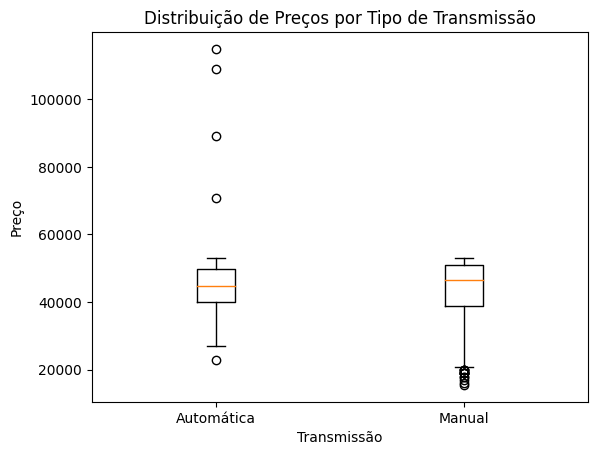

'O carro Uno tem a transmissão mais comum: Manual'

'O carro Mobi tem a transmissão mais comum: Manual'

'O carro Gol tem a transmissão mais comum: Manual'

'O carro Ka tem a transmissão mais comum: Manual'

'O carro Kwid tem a transmissão mais comum: Manual'

'O carro Onix tem a transmissão mais comum: Manual'

'O carro Fox tem a transmissão mais comum: Manual'

'O carro HB20 tem a transmissão mais comum: Manual'

'O carro Sandero tem a transmissão mais comum: Manual'

'O carro Palio tem a transmissão mais comum: Manual'

In [19]:
carros_auto = df[df['Transmissão'] == 'Automático']['Preço']
carros_manual = df[df['Transmissão'] == 'Manual']['Preço']
plt.boxplot([carros_auto, carros_manual], labels=['Automática', 'Manual'])
plt.xlabel('Transmissão')
plt.ylabel('Preço')
plt.title('Distribuição de Preços por Tipo de Transmissão')
plt.show()

carros_mais_anunciados = df['Carro'].value_counts().head(10)
for carro in carros_mais_anunciados.index:
    transmissao_mais_comum = df[df['Carro'] == carro]['Transmissão'].value_counts().idxmax()
    display(f"O carro {carro} tem a transmissão mais comum: {transmissao_mais_comum}")

Com base na análise dos dados, podemos observar algumas tendências interessantes em relação à transmissão dos carros.

Primeiramente, constatamos que os carros mais caros geralmente são equipados com transmissão automática. Essa relação pode indicar uma preferência por esse tipo de transmissão em veículos de maior valor, possivelmente relacionada a uma percepção de maior conforto e conveniência.

Por outro lado, os carros mais baratos tendem a ter transmissão manual. Essa escolha pode estar relacionada a uma busca por uma opção mais econômica, tanto em termos de preço de compra quanto de manutenção.

Além disso, ao analisar os carros mais anunciados, observamos que todos eles possuem transmissão manual. Essa informação sugere que, no contexto do site de anúncios de carros em questão, os modelos com transmissão manual são mais comuns e populares entre os usuários.

##### Qual a Descrição mais Comum para os Carros mais Anunciados?

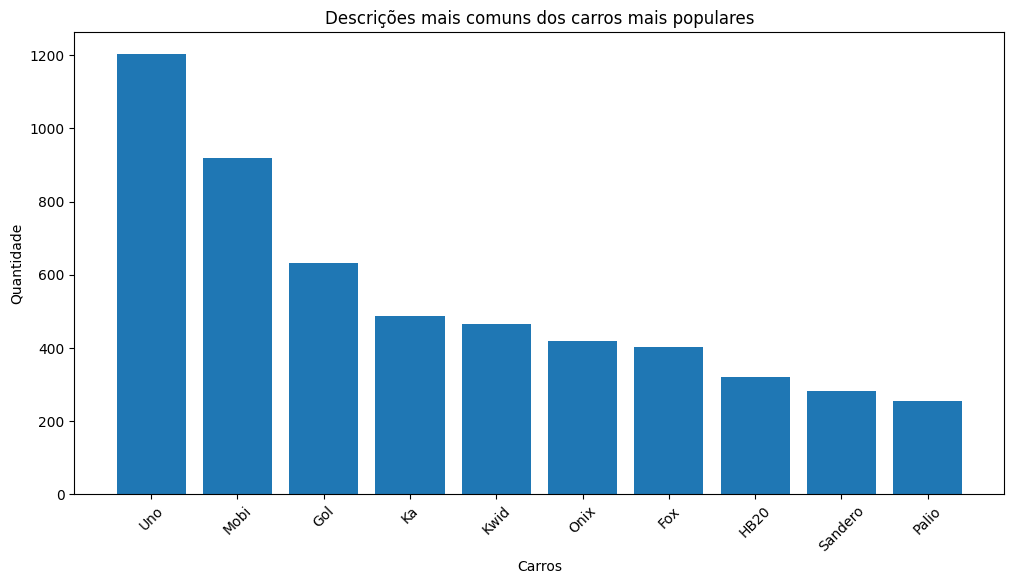

'Descrição mais comum para o carro Uno: Uno 1.0 Attractive'

'Descrição mais comum para o carro Mobi: Mobi 1.0 Like'

'Descrição mais comum para o carro Gol: Gol 1.0 MPI (Flex)'

'Descrição mais comum para o carro Ka: Ka 1.0 SE (Flex)'

'Descrição mais comum para o carro Kwid: Kwid 1.0 Zen'

'Descrição mais comum para o carro Onix: Onix 1.0 Joy SPE/4'

'Descrição mais comum para o carro Fox: Fox 1.6 VHT (Flex)'

'Descrição mais comum para o carro HB20: HB20 1.0 Comfort'

'Descrição mais comum para o carro Sandero: Sandero Expression 1.0 12V SCe (Flex)'

'Descrição mais comum para o carro Palio: Palio Fire 1.0 8V (Flex) 4p'

In [20]:
carros_mais_comuns = df['Carro'].value_counts().head(10) 
plt.figure(figsize=(12, 6))
plt.bar(carros_mais_comuns.index, carros_mais_comuns.values)
plt.xlabel('Carros')
plt.ylabel('Quantidade')
plt.title('Descrições mais comuns dos carros mais populares')
plt.xticks(rotation=45)
plt.show()

for carro in carros_mais_comuns.index:
    descricao_mais_comum = df[df['Carro'] == carro]['Descrição'].value_counts().idxmax()
    display(f'Descrição mais comum para o carro {carro}: {descricao_mais_comum}')

Ao analisar as descrições mais comuns dos 10 carros mais populares, podemos observar que, em geral, as versões de entrada são as mais anunciadas. Isso indica que há uma demanda significativa por modelos básicos e acessíveis no mercado.
Essas versões de entrada dos carros mais populares podem oferecer uma boa relação custo-benefício para os compradores, proporcionando as características essenciais do modelo a um preço mais acessível.

##### Qual o Preço Médio dos carros mais anunciados

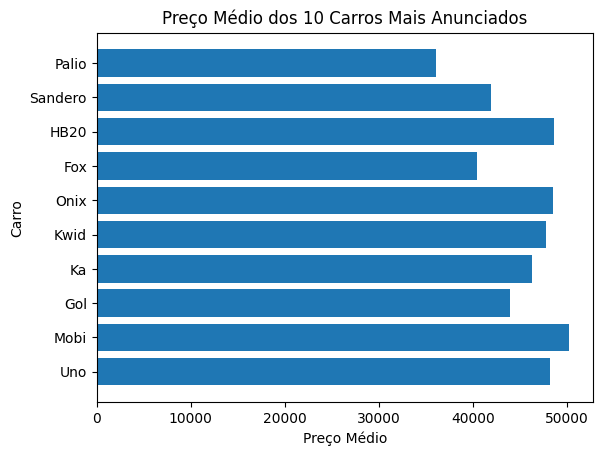

'Carro: Uno - Preço Médio: R$48159.74'

'Carro: Mobi - Preço Médio: R$50216.18'

'Carro: Gol - Preço Médio: R$43958.16'

'Carro: Ka - Preço Médio: R$46267.23'

'Carro: Kwid - Preço Médio: R$47752.49'

'Carro: Onix - Preço Médio: R$48509.26'

'Carro: Fox - Preço Médio: R$40381.94'

'Carro: HB20 - Preço Médio: R$48632.08'

'Carro: Sandero - Preço Médio: R$41931.60'

'Carro: Palio - Preço Médio: R$36102.06'

In [21]:
carros_mais_anunciados = df['Carro'].value_counts().head(10).index.tolist()

precos_medios = []
for carro in carros_mais_anunciados:
    preco_medio = df[df['Carro'] == carro]['Preço'].mean()
    precos_medios.append(preco_medio)

plt.barh(carros_mais_anunciados, precos_medios)
plt.xlabel('Preço Médio')
plt.ylabel('Carro')
plt.title('Preço Médio dos 10 Carros Mais Anunciados')
plt.show()

for carro in carros_mais_anunciados:
    preco_medio = df[df['Carro'] == carro]['Preço'].mean()
    display(f"Carro: {carro} - Preço Médio: R${preco_medio:.2f}")

Com base nos dados, podemos observar os preços médios dos carros mais populares.
O Mobi apresenta o preço médio mais alto, atingindo 50.216,18, seguido pelo Uno, Onix e HB20, com valores próximos na faixa de 48.000 a 49.000. O Ka e o Kwid também estão na mesma faixa de preço, em torno de 46.000 a 47.000. O Gol e o Sandero possuem valores médios próximos de 43.000 a 44.000, enquanto o Fox e o Palio têm os preços médios mais baixos, ficando em torno de 40.000 a 36.000, respectivamente. Essas informações podem auxiliar na compreensão dos preços médios dos carros mais populares no mercado.

# Considerações Finais

Com Base na Análise dos Dados temos como considerações finais:

Carros Mais Anunciados: Os carros mais anunciados, como Uno, Mobi, Gol, Ka, Kwid, Onix, Fox, HB20, Sandero e Palio, são exemplos de modelos populares que despertam grande interesse entre os compradores. Esses modelos representam uma parcela significativa dos anúncios e refletem uma demanda considerável por veículos populares devido a sua combinação de preço acessível, bom desempenho, economia de combustível e ampla disponibilidade de peças de reposição. Os preços médios desses carros variam, com modelos como Mobi e Onix atingindo valores em torno de 50.000, enquanto Fox e Palio possuem preços médios mais baixos, em torno de 40.000 a 36.000, respectivamente. Essas características e faixa de preços tornam esses carros opções atraentes para uma ampla gama de consumidores em busca de um veículo prático e confiável.

Análise de Transmissão: Carros mais caros geralmente possuem transmissão automática, enquanto os modelos mais anunciados são equipados com transmissão manual. Os preços médios dos carros automáticos são mais altos, indicando uma percepção de maior valor atribuída a essa opção. Além disso, a distribuição de preços para carros automáticos é mais dispersa, refletindo uma maior variedade de características e opções. Por outro lado, os carros manuais tendem a ter preços mais baixos e uma distribuição mais concentrada em valores acessíveis. 

Estados com Maior Quantidade de Carros: São Paulo se destaca como o estado com a maior quantidade de anúncios, seguido pelo Rio de Janeiro, Paraná, Minas Gerais e Santa Catarina. Esses estados demonstram uma concentração de carros anunciados o que reflete uma maior atividade no mercado automotivo nessas regiões.

Cidades com Maior Quantidade de Carros: São Paulo lidera a contagem, seguida pelo Rio de Janeiro, Campinas, Curitiba e Belo Horizonte. Essas cidades apresentam uma concentração considerável de carros anunciados, sugerindo uma alta demanda por veículos na Região Sudeste.

Anos de Fabricação: Os anos mais frequentes nos carros anunciados foram 2021, 2014, 2013, 2020 e 2012. Isso indica uma preferência por carros mais recentes, provavelmente devido à busca por modelos mais atualizados e tecnologicamente avançados.

Descrições mais Comuns: A versão de entrada ou descrição mais comum para os carros populares é predominante nos anúncios. Essa informação sugere que os compradores tendem a procurar por opções mais básicas e acessíveis desses modelos.

A análise dos dados revela que os carros mais anunciados são modelos populares, com transmissão manual e anos de fabricação recentes. São Paulo é o estado e a cidade com maior quantidade de carros anunciados, indicando uma alta demanda na região Sudeste. Os preços médios dos carros automáticos são mais altos, refletindo uma percepção de maior valor atribuída a essa opção. Essas informações são úteis para compradores em busca de veículos populares, acessíveis e recentes, além de auxiliar vendedores a entender as preferências do mercado automotivo.